In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

%matplotlib inline

# Import data
df = pd.read_csv("data/all_data_3.csv");

# Set user groups from enabled features

# Abbreviations:
# - BG: User got no explanations (base group).

df.loc[(df['GpsQuality'] == False) & (df['TrafficVolume'] == False) & (df['RouteExplanation'] == False) & (df['UserCount'] == False), 'task'] = "BG"
#df.loc[(df['GpsQuality'] == False) & (df['TrafficVolume'] == False) & (df['RouteExplanation'] == True) & (df['UserCount'] == True), 'task'] = "AE"
#df.loc[(df['GpsQuality'] == True) & (df['TrafficVolume'] == True) & (df['RouteExplanation'] == False) & (df['UserCount'] == False), 'task'] = "NE"
#df.loc[(df['GpsQuality'] == True) & (df['TrafficVolume'] == True) & (df['RouteExplanation'] == True) & (df['UserCount'] == True), 'task'] = "GE"

df = df[df['task'].notna()]

df = df[df['DistanceTraveledInMeters'] > 5000]
df.loc[(df['LowAccuracyCounter'].isna()), 'LowAccuracyCounter'] = 0
df.loc[(df['DistanceTraveledInMeters'].isna()), 'DistanceTraveledInMeters'] = 0
df.loc[(df['NumberOfTimesSeenUserCountExplanationShort'].isna()), 'NumberOfTimesSeenUserCountExplanationShort'] = 0
df.loc[(df['NumberOfTimesSeenUserCountExplanationLong'].isna()), 'NumberOfTimesSeenUserCountExplanationLong'] = 0
df.loc[(df['NumberOfTimesSeenCollaborativeRoutingExplanation'].isna()), 'NumberOfTimesSeenCollaborativeRoutingExplanation'] = 0
df.loc[(df['NumberOfUnnormalRoutes'].isna()), 'NumberOfUnnormalRoutes'] = 0
df["LowAccuracyPerKilometer"] = df["LowAccuracyCounter"] / (df["DistanceTraveledInMeters"] / 1000)
df["DrivingTimeDif"] = (df["ActualDrivingTime"] - df["EstimatedDrivingTime"])
df.loc[(np.abs(df['DrivingTimeDif']) < 2000), 'DrivingTimeDif'] = 0
df["DrivingTimeRelativDif"] = df["DrivingTimeDif"] / df["EstimatedDrivingTime"]

df.loc[(np.abs(df['DrivingTimeDif']) > 0.1), 'BadETA'] = True
df.loc[(np.abs(df['DrivingTimeDif']) <= 0.1), 'BadETA'] = False

df.loc[(np.abs(df['LowAccuracyPerKilometer']) > 0.2), 'BadAccuracy'] = True
df.loc[(np.abs(df['LowAccuracyPerKilometer']) <= 0.2), 'BadAccuracy'] = False

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df[df['DrivingTimeDif'].notna()]

# Remove fields with redundant information
df = df.drop(columns=['GpsQuality', 'TrafficVolume', 'RouteExplanation', 'UserCount'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4807 entries, 33 to 41528
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   DeviceId                                          4807 non-null   object 
 1   numberOfRoutes                                    4807 non-null   int64  
 2   InitialTrafficVolume                              4807 non-null   object 
 3   DistanceTraveledInMeters                          4807 non-null   int64  
 4   OffRoutePerTenKilometers                          4807 non-null   float64
 5   LowAccuracyCounter                                4807 non-null   int64  
 6   Rating                                            133 non-null    float64
 7   NumberOfTimesSeenUserCountExplanationShort        4807 non-null   float64
 8   NumberOfTimesSeenUserCountExplanationLong         4807 non-null   float64
 9   NumberOfTimesSeen

In [2]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,numberOfRoutes,DistanceTraveledInMeters,OffRoutePerTenKilometers,LowAccuracyCounter,Rating,NumberOfTimesSeenUserCountExplanationShort,NumberOfTimesSeenUserCountExplanationLong,NumberOfTimesSeenCollaborativeRoutingExplanation,ActualDrivingTime,EstimatedDrivingTime,MaxLowAccuracy,NumberOfUnnormalRoutes,LowAccuracyPerKilometer,DrivingTimeDif,DrivingTimeRelativDif,BadETA,BadAccuracy
numberOfRoutes,1.000000,-0.098855,-0.027932,-0.063782,0.019012,0.016906,0.022098,0.001019,-0.043716,-0.130775,0.087434,0.034034,-0.026851,0.039574,0.026542,-0.034180,-0.011642
DistanceTraveledInMeters,-0.098855,1.000000,-0.062736,0.198563,0.050130,-0.006703,-0.013368,0.004131,0.517745,0.710619,0.078598,-0.020694,-0.074126,-0.006779,-0.030265,0.192713,-0.056647
OffRoutePerTenKilometers,-0.027932,-0.062736,1.000000,0.104142,-0.475630,-0.009866,-0.011635,-0.013064,0.028810,0.002684,0.050161,0.005198,0.150363,0.021693,0.052915,0.093969,0.134526
LowAccuracyCounter,-0.063782,0.198563,0.104142,1.000000,0.069240,-0.016804,-0.010558,-0.011430,0.150492,0.142535,0.511748,0.007198,0.615463,0.040655,-0.002613,0.065211,0.457685
Rating,0.019012,0.050130,-0.475630,0.069240,1.000000,nan,nan,nan,-0.010270,0.053224,-0.204458,nan,0.088119,-0.059660,-0.004188,0.032976,0.080275
NumberOfTimesSeenUserCountExplanationShort,0.016906,-0.006703,-0.009866,-0.016804,nan,1.000000,0.773472,0.370319,-0.007579,-0.008809,-0.011684,0.105888,-0.011916,0.001998,0.001665,-0.011690,-0.007092
NumberOfTimesSeenUserCountExplanationLong,0.022098,-0.013368,-0.011635,-0.010558,nan,0.773472,1.000000,0.344111,-0.013798,-0.014949,-0.006996,0.148099,-0.008170,-0.000559,-0.003041,-0.022054,-0.007692
NumberOfTimesSeenCollaborativeRoutingExplanation,0.001019,0.004131,-0.013064,-0.011430,nan,0.370319,0.344111,1.000000,-0.002396,-0.011604,0.000972,0.108715,-0.004622,0.005453,0.016791,-0.020637,-0.010242
ActualDrivingTime,-0.043716,0.517745,0.028810,0.150492,-0.010270,-0.007579,-0.013798,-0.002396,1.000000,0.371185,0.088004,-0.017011,-0.030758,0.727106,0.404376,0.370161,-0.031950
EstimatedDrivingTime,-0.130775,0.710619,0.002684,0.142535,0.053224,-0.008809,-0.014949,-0.011604,0.371185,1.000000,0.054991,-0.020902,-0.064691,-0.357036,-0.070379,0.422984,-0.057834


In [3]:
chartColors=["#00509B", "#C8D317", "#999999", "#8FA6CA", "#EE6429", "#E4AF8E"]

In [4]:
g = df.groupby(['DeviceId', 'task']).mean()
grouped_data_raw = g.reset_index()

grouped_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 19 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   DeviceId                                          1210 non-null   object 
 1   task                                              1210 non-null   object 
 2   numberOfRoutes                                    1210 non-null   float64
 3   DistanceTraveledInMeters                          1210 non-null   float64
 4   OffRoutePerTenKilometers                          1210 non-null   float64
 5   LowAccuracyCounter                                1210 non-null   float64
 6   Rating                                            44 non-null     float64
 7   NumberOfTimesSeenUserCountExplanationShort        1210 non-null   float64
 8   NumberOfTimesSeenUserCountExplanationLong         1210 non-null   float64
 9   NumberOfTimesSeenCo

In [5]:
corr = grouped_data_raw.corr()
corr.style.background_gradient(cmap='coolwarm')

,numberOfRoutes,DistanceTraveledInMeters,OffRoutePerTenKilometers,LowAccuracyCounter,Rating,NumberOfTimesSeenUserCountExplanationShort,NumberOfTimesSeenUserCountExplanationLong,NumberOfTimesSeenCollaborativeRoutingExplanation,ActualDrivingTime,EstimatedDrivingTime,MaxLowAccuracy,NumberOfUnnormalRoutes,LowAccuracyPerKilometer,DrivingTimeDif,DrivingTimeRelativDif,BadETA,BadAccuracy
numberOfRoutes,1.000000,-0.059743,-0.025908,-0.014942,0.075368,0.145358,0.182272,0.130548,-0.022036,-0.093458,0.165137,0.157869,0.003701,0.067118,0.057324,-0.073031,0.009782
DistanceTraveledInMeters,-0.059743,1.000000,-0.089324,0.172518,0.046460,-0.021677,-0.026696,-0.001509,0.695532,0.608456,0.117751,-0.024882,-0.089901,-0.029747,-0.037448,0.210023,-0.061896
OffRoutePerTenKilometers,-0.025908,-0.089324,1.000000,0.154213,-0.466410,-0.014571,-0.018901,-0.016543,0.011522,-0.002225,0.090213,-0.006645,0.291930,-0.003456,0.100862,0.076683,0.218193
LowAccuracyCounter,-0.014942,0.172518,0.154213,1.000000,0.028540,-0.027413,-0.006057,-0.014561,0.195589,0.123468,0.788199,0.034558,0.700992,0.027414,0.010025,0.092584,0.506693
Rating,0.075368,0.046460,-0.466410,0.028540,1.000000,nan,nan,nan,0.029603,0.073680,-0.103155,nan,0.077926,-0.089322,0.090000,0.192963,0.066319
NumberOfTimesSeenUserCountExplanationShort,0.145358,-0.021677,-0.014571,-0.027413,nan,1.000000,0.766697,0.389442,-0.013779,-0.028306,0.011608,0.108454,-0.016163,0.020503,0.032474,-0.006346,-0.011357
NumberOfTimesSeenUserCountExplanationLong,0.182272,-0.026696,-0.018901,-0.006057,nan,0.766697,1.000000,0.379342,-0.025299,-0.031799,0.029518,0.186600,-0.002627,0.012738,0.004517,-0.037127,-0.012681
NumberOfTimesSeenCollaborativeRoutingExplanation,0.130548,-0.001509,-0.016543,-0.014561,nan,0.389442,0.379342,1.000000,-0.002187,-0.030850,0.063467,0.107129,0.006020,0.025666,0.066594,-0.033900,-0.015484
ActualDrivingTime,-0.022036,0.695532,0.011522,0.195589,0.029603,-0.013779,-0.025299,-0.002187,1.000000,0.428207,0.151680,-0.021969,-0.035128,0.401940,0.334974,0.328626,-0.040880
EstimatedDrivingTime,-0.093458,0.608456,-0.002225,0.123468,0.073680,-0.028306,-0.031799,-0.030850,0.428207,1.000000,0.074501,-0.023932,-0.066353,-0.646474,-0.126714,0.535628,-0.065653


In [6]:
# Filter for unusable data
filtered_data = df

filtered_data = filtered_data[filtered_data['DistanceTraveledInMeters']>5000]

filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4807 entries, 33 to 41528
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   DeviceId                                          4807 non-null   object 
 1   numberOfRoutes                                    4807 non-null   int64  
 2   InitialTrafficVolume                              4807 non-null   object 
 3   DistanceTraveledInMeters                          4807 non-null   int64  
 4   OffRoutePerTenKilometers                          4807 non-null   float64
 5   LowAccuracyCounter                                4807 non-null   int64  
 6   Rating                                            133 non-null    float64
 7   NumberOfTimesSeenUserCountExplanationShort        4807 non-null   float64
 8   NumberOfTimesSeenUserCountExplanationLong         4807 non-null   float64
 9   NumberOfTimesSeen

In [7]:
g = filtered_data.groupby(['DeviceId', 'task']).mean()
grouped_data_filtered = g.reset_index()

grouped_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 19 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   DeviceId                                          1210 non-null   object 
 1   task                                              1210 non-null   object 
 2   numberOfRoutes                                    1210 non-null   float64
 3   DistanceTraveledInMeters                          1210 non-null   float64
 4   OffRoutePerTenKilometers                          1210 non-null   float64
 5   LowAccuracyCounter                                1210 non-null   float64
 6   Rating                                            44 non-null     float64
 7   NumberOfTimesSeenUserCountExplanationShort        1210 non-null   float64
 8   NumberOfTimesSeenUserCountExplanationLong         1210 non-null   float64
 9   NumberOfTimesSeenCo

In [8]:
# Only use data relevant for offroute analysis

or_data = filtered_data

or_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4807 entries, 33 to 41528
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   DeviceId                                          4807 non-null   object 
 1   numberOfRoutes                                    4807 non-null   int64  
 2   InitialTrafficVolume                              4807 non-null   object 
 3   DistanceTraveledInMeters                          4807 non-null   int64  
 4   OffRoutePerTenKilometers                          4807 non-null   float64
 5   LowAccuracyCounter                                4807 non-null   int64  
 6   Rating                                            133 non-null    float64
 7   NumberOfTimesSeenUserCountExplanationShort        4807 non-null   float64
 8   NumberOfTimesSeenUserCountExplanationLong         4807 non-null   float64
 9   NumberOfTimesSeen

In [9]:
# Remove outliers
#
# > An outlier of a dataset is defined as a value that is more than 3 standard deviations from the mean.
# > Removing outliers from a pandas.DataFrame removes any rows in the DataFrame which contain an outlier.
# > Outlier calculations are performed separately for each column.

or_data = or_data[np.abs(or_data.OffRoutePerTenKilometers-or_data.OffRoutePerTenKilometers.mean())<=(3*or_data.OffRoutePerTenKilometers.std())]

or_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4741 entries, 33 to 41528
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   DeviceId                                          4741 non-null   object 
 1   numberOfRoutes                                    4741 non-null   int64  
 2   InitialTrafficVolume                              4741 non-null   object 
 3   DistanceTraveledInMeters                          4741 non-null   int64  
 4   OffRoutePerTenKilometers                          4741 non-null   float64
 5   LowAccuracyCounter                                4741 non-null   int64  
 6   Rating                                            133 non-null    float64
 7   NumberOfTimesSeenUserCountExplanationShort        4741 non-null   float64
 8   NumberOfTimesSeenUserCountExplanationLong         4741 non-null   float64
 9   NumberOfTimesSeen

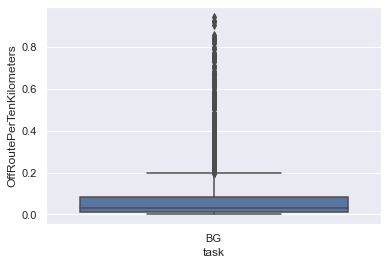

In [10]:
sns.set()
sns.boxplot(data=df, x=or_data.task, y=or_data.OffRoutePerTenKilometers)
plt.show()

p < 0.05 -> we can reject the 0-Hypotheses.

Groups are not normally distributed thus we have to take Kruskal Wallis instead of ANONVA

### References

- Glass, G.V., P.D. Peckham, and J.R. Sanders. 1972. Consequences of failure to meet assumptions underlying fixed effects analyses of variance and covariance. Rev. Educ. Res. 42: 237-288.
- Harwell, M.R., E.N. Rubinstein, W.S. Hayes, and C.C. Olds. 1992. Summarizing Monte Carlo results in methodological research: the one- and two-factor fixed effects ANOVA cases. J. Educ. Stat. 17: 315-339.
- Lix, L.M., J.C. Keselman, and H.J. Keselman. 1996. Consequences of assumption violations revisited: A quantitative review of alternatives to the one-way analysis of variance F test. Rev. Educ. Res. 66: 579-619.

In [11]:
import pingouin as pg

res = pg.kruskal(data=or_data, dv='OffRoutePerTenKilometers', between='BadAccuracy')

print(res)

              Source  ddof1          H         p-unc
Kruskal  BadAccuracy      1  62.004576  3.426601e-15


p < 0.05 --> we can reject the 0-Hypothesis.

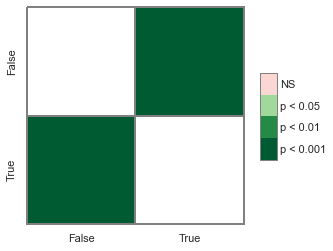

              False          True
False  1.000000e+00  3.426601e-15
True   3.426601e-15  1.000000e+00
Mean Bad Accuracy:  0.18595251418625192 BG:  0.0323676970383557  STD:  0.11959752518945468 
Mean Good Accuracy:  0.07210457884876675 AE:  nan  STD:  nan 


In [12]:
import scipy.stats as st
import scikit_posthocs as sp
from statsmodels.stats.anova import AnovaRM

#pairwise testing:

pc = sp.posthoc_dunn(or_data, val_col="OffRoutePerTenKilometers", group_col='BadAccuracy', p_adjust="bonferroni")


heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
plt.show()
print(pc)

print("Mean Bad Accuracy: ", or_data[or_data.BadAccuracy == True].OffRoutePerTenKilometers.mean(), "BG: ", or_data[or_data.task == "BG"].OffRoutePerTenKilometers.median(), " STD: ", or_data[or_data.task == "BG"].OffRoutePerTenKilometers.std(),"")
print("Mean Good Accuracy: ", or_data[or_data.BadAccuracy == False].OffRoutePerTenKilometers.mean(), "AE: ", or_data[or_data.task == "AE"].OffRoutePerTenKilometers.median(), " STD: ", or_data[or_data.task == "AE"].OffRoutePerTenKilometers.std(),"")

In [13]:
pg.pairwise_tukey(data=or_data, dv='OffRoutePerTenKilometers', between='task')

/usr/local/lib/python3.9/site-packages/pingouin/parametric.py:979: RuntimeWarning: divide by zero encountered in double_scalars
  msbetween = ssbetween / ddof1


ValueError: not enough values to unpack (expected 2, got 0)